In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import plotly
import pandas as pd
import plotly.express as px





# Methodology

## Part 1: Data Exploration and Preprocessing



### Step 1: Load and Explore the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_purchase_data_code.csv to customer_purchase_data_code (1).csv


In [ ]:
df_oring = pd.read_csv("customer_purchase_data_code (1).csv")
df_oring

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120,8,0,30,0,5,1
1,20,1,23579,4,2,38,0,5,0
2,27,1,127821,11,2,31,1,0,1
3,24,1,137798,19,3,46,0,4,1
4,31,1,99300,19,1,19,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048,13,0,34,0,5,1
1496,67,1,28775,18,2,17,0,1,1
1497,40,1,57363,7,4,12,0,0,0
1498,63,0,134021,16,2,37,1,0,1


### 1.2 Understand the Structure of the Dataset

In [ ]:
# Remove all decimal points up in columns AnnualIncome and TimeSpentOnWebsite
df_oring['AnnualIncome'] = df_oring['AnnualIncome'].astype(int)
df_oring['TimeSpentOnWebsite'] = df_oring['TimeSpentOnWebsite'].astype(int)
df_oring

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120,8,0,30,0,5,1
1,20,1,23579,4,2,38,0,5,0
2,27,1,127821,11,2,31,1,0,1
3,24,1,137798,19,3,46,0,4,1
4,31,1,99300,19,1,19,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048,13,0,34,0,5,1
1496,67,1,28775,18,2,17,0,1,1
1497,40,1,57363,7,4,12,0,0,0
1498,63,0,134021,16,2,37,1,0,1


In [ ]:
# View data types and missing values
print(df_oring.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 1500 non-null   int64
 1   Gender              1500 non-null   int64
 2   AnnualIncome        1500 non-null   int64
 3   NumberOfPurchases   1500 non-null   int64
 4   ProductCategory     1500 non-null   int64
 5   TimeSpentOnWebsite  1500 non-null   int64
 6   LoyaltyProgram      1500 non-null   int64
 7   DiscountsAvailed    1500 non-null   int64
 8   PurchaseStatus      1500 non-null   int64
dtypes: int64(9)
memory usage: 105.6 KB
None


In [ ]:
# Checking for missing values
print(df_oring.isnull().sum())


Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


In [ ]:
# make a new dataframe without the Gender and ProductCategory columns
df = df_oring.drop(['Gender', 'ProductCategory'], axis=1)
df

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,66120,8,30,0,5,1
1,20,23579,4,38,0,5,0
2,27,127821,11,31,1,0,1
3,24,137798,19,46,0,4,1
4,31,99300,19,19,0,0,1
...,...,...,...,...,...,...,...
1495,39,65048,13,34,0,5,1
1496,67,28775,18,17,0,1,1
1497,40,57363,7,12,0,0,0
1498,63,134021,16,37,1,0,1


In [ ]:
df.describe()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,84248.666667,10.420000,29.983333,0.326667,2.555333,0.43200
std,15.537259,37629.487904,5.887391,16.975016,0.469151,1.705152,0.49552
min,18.000000,20001.000000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,31.000000,53028.250000,5.000000,16.000000,0.000000,1.000000,0.00000
50%,45.000000,83699.000000,11.000000,30.000000,0.000000,3.000000,0.00000
75%,57.000000,117167.000000,15.000000,44.000000,1.000000,4.000000,1.00000
max,70.000000,149785.000000,20.000000,59.000000,1.000000,5.000000,1.00000


In [ ]:
print(df.isnull().sum())

Age                   0
AnnualIncome          0
NumberOfPurchases     0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


### Step 2: Data Preprocessing
#### 2.1 Feature Scaling


In [ ]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Age',	'AnnualIncome',	'NumberOfPurchases', 'TimeSpentOnWebsite',	'DiscountsAvailed']

df[numerical_features] = scaler.fit_transform(df[numerical_features])

#### 2.2 Exploratory Data Analysis (EDA)

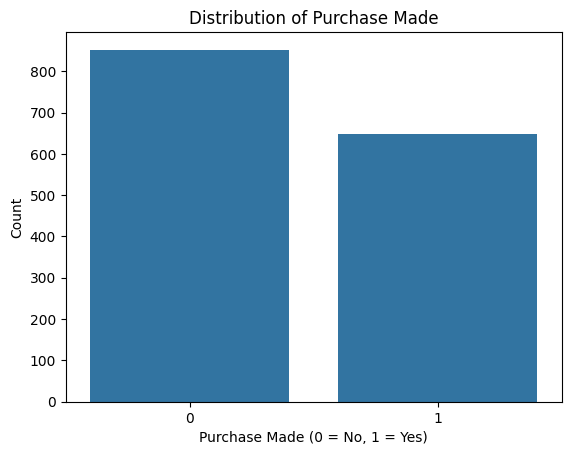

In [ ]:
# Distribution of the target variable
sns.countplot(x='PurchaseStatus', data=df)
plt.title('Distribution of Purchase Made')
plt.xlabel('Purchase Made (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
# value counts of PurchaseStatus
df['PurchaseStatus'].value_counts()

,count
PurchaseStatus,
0,852
1,648


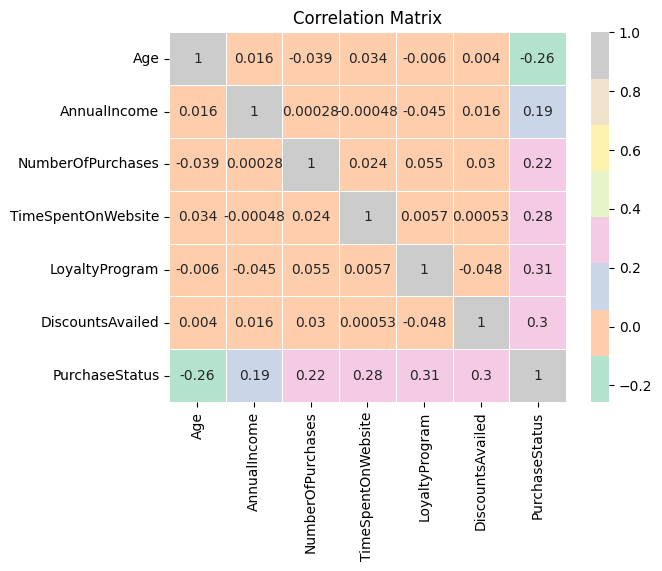

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## Part 2: Training, Testing, Implementing, Evaluating and Comparing

### Step 3: Splitting the Dataset

In [ ]:
# Split data into features (X) and target (y)
# X = df.drop('target_column', axis=1)

X = df.drop(columns=["PurchaseStatus"], axis=1)
X

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,-0.276761,-0.481928,-0.411185,0.000982,0,1.434172
1,-1.564418,-1.612828,-1.090830,0.472420,0,1.434172
2,-1.113738,1.158317,0.098548,0.059912,1,-1.499095
3,-1.306887,1.423543,1.457838,0.943858,0,0.847519
4,-0.856207,0.400121,1.457838,-0.647245,0,-1.499095
...,...,...,...,...,...,...
1495,-0.341143,-0.510426,0.438371,0.236701,0,1.434172
1496,1.461577,-1.474699,1.287927,-0.765105,0,-0.912442
1497,-0.276761,-0.714722,-0.581096,-1.059753,0,-1.499095
1498,1.204046,1.323136,0.948104,0.413490,1,-1.499095


In [ ]:
# Get the target column
y = df["PurchaseStatus"]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4. Model Selection and Implementation

#### 4.1 Logistic Regression

In [ ]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)


In [ ]:
# Print the model training score and testing score
print("Logistic Regression Training Score:", log_reg.score(X_train, y_train))
print("Logistic Regression Testing Score:", log_reg.score(X_test, y_test))


Logistic Regression Training Score: 0.8191666666666667
Logistic Regression Testing Score: 0.8433333333333334


In [ ]:
# Print classification report
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       172
           1       0.89      0.73      0.80       128

    accuracy                           0.84       300
   macro avg       0.85      0.83      0.84       300
weighted avg       0.85      0.84      0.84       300



#### 4.2 Decision Tree

In [ ]:
# Create the decision tree classifier instance
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [ ]:
# Fit the model
dt_model = model.fit(X_train, y_train)

In [ ]:
# Making predictions using the testing data
y_pred_tree = dt_model.predict(X_test)

In [ ]:
# Print the training score
print("Decision Tree Training Score:", dt_model.score(X_train, y_train))
print("Decision Tree Testing Score:", dt_model.score(X_test, y_test))

Decision Tree Training Score: 1.0
Decision Tree Testing Score: 0.9166666666666666


In [ ]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred_tree)

print(f"Decision Tree Accuracy Score : {acc_score}")

Decision Tree Accuracy Score : 0.9166666666666666


#### 4.3 Random Forest

In [ ]:
# Initialize the Random Forest model
forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
forest.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = forest.predict(X_test)


In [ ]:
# Print the model training score and testing score
print("Random Forest Training Score:", forest.score(X_train, y_train))
print("Random Forest Testing Score:", forest.score(X_test, y_test))


Random Forest Training Score: 1.0
Random Forest Testing Score: 0.9566666666666667


### Step 5. Model Evaluation and Results Comparison

#### 5.1 Model Evaluation
- Evaluated each model using specific metrics commonly used for binary classification to determine their performance.

#### 5.2 Comparing Model Performance
- **Defined a Function for Evaluation:** To avoid repetitive code, we created a function that evaluates and prints specific metrics for any model.

#### 5.3 Model Performance Results

Evaluation Metrics for Logistic Regression:
Accuracy: 0.8433
Precision: 0.8857
Recall: 0.7266
F1 Score: 0.7983
ROC AUC Score: 0.8284


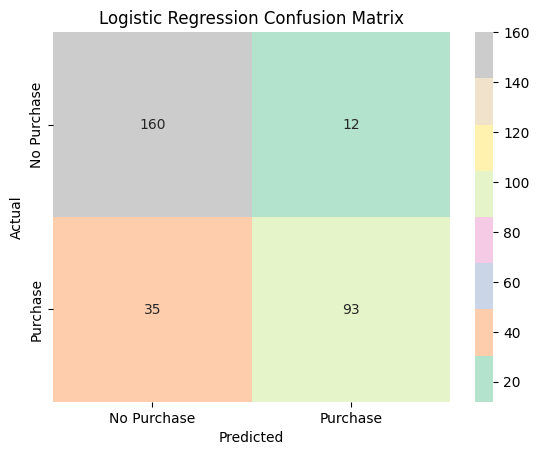

Evaluation Metrics for Decision Tree:
Accuracy: 0.9167
Precision: 0.9478
Recall: 0.8516
F1 Score: 0.8971
ROC AUC Score: 0.9083


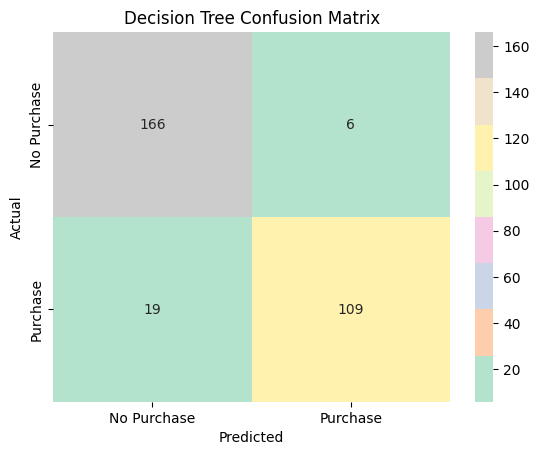

Evaluation Metrics for Random Forest:
Accuracy: 0.9567
Precision: 0.9915
Recall: 0.9062
F1 Score: 0.9469
ROC AUC Score: 0.9502


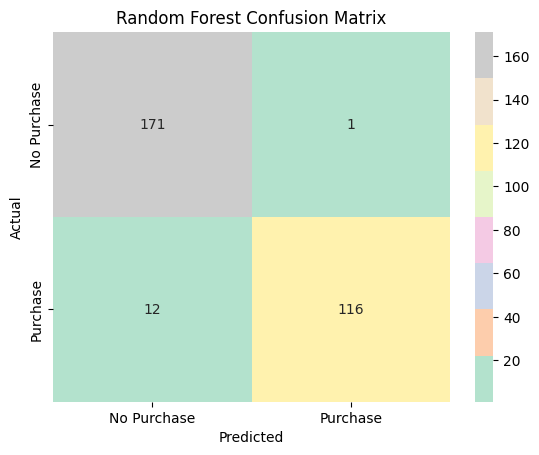

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_tree, "Decision Tree")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_forest, "Random Forest")


Evaluation Metrics for Logistic Regression:
Accuracy: 0.8433
Precision: 0.8857
Recall: 0.7266
F1 Score: 0.7983
ROC AUC Score: 0.8284
Evaluation Metrics for Decision Tree:
Accuracy: 0.9167
Precision: 0.9478
Recall: 0.8516
F1 Score: 0.8971
ROC AUC Score: 0.9083
Evaluation Metrics for Random Forest:
Accuracy: 0.9567
Precision: 0.9915
Recall: 0.9062
F1 Score: 0.9469
ROC AUC Score: 0.9502


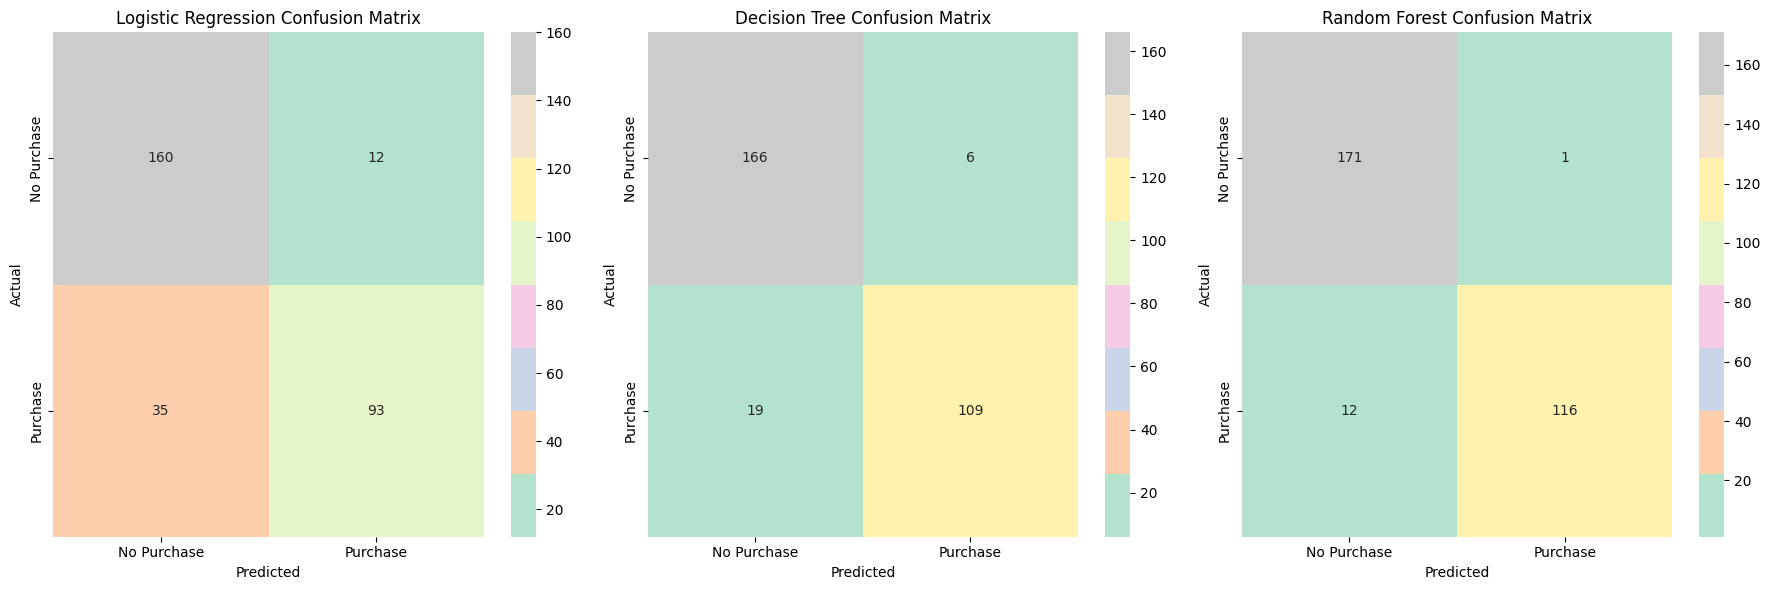

In [ ]:
# Updated code to print above matrix side by side to so it would fit nicely in ReadMe

# Function to evaluate the model and plot confusion matrix
def evaluate_model(y_true, y_pred, model_name, ax):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2', ax=ax, xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Set up subplots for confusion matrices of the 3 models side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression", ax=axes[0])

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_tree, "Decision Tree", ax=axes[1])

# Evaluate Random Forest
evaluate_model(y_test, y_pred_forest, "Random Forest", ax=axes[2])

# Adjust layout
plt.tight_layout()
plt.show()


## Part 3: Model Optimization, Evaluation and Visualization Results  

#### 6.1 Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='f1', random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)

# Use the best model
best_forest = random_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
145 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters found:  {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 447}


In [ ]:
# Initialize the Random Forest model
forest_rs = RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=447, random_state=42)

# Train the model
forest_rs.fit(X_train, y_train)

# Predict on the test set
y_pred_forest_rs = forest_rs.predict(X_test)

In [ ]:
# Print the model training score and testing score
print("RS Random Forest Training Score:", forest_rs.score(X_train, y_train))
print("RS Random Forest Testing Score:", forest_rs.score(X_test, y_test))


RS Random Forest Training Score: 0.9725
RS Random Forest Testing Score: 0.95


In [ ]:
# evaluate forest_rs model
evaluate_model(y_test, y_pred_forest_rs, "RS Random Forest")

TypeError: evaluate_model() missing 1 required positional argument: 'ax'

In [ ]:
feature_importances = pd.Series(forest_rs.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
sorted_importances

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


feature_importances = pd.Series(forest_rs.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance with enhanced visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_importances.index, sorted_importances.values, color=plt.cm.Purples(sorted_importances.values / max(sorted_importances.values)))

# Add title and labels
plt.title('Random Search Feature Importance', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=50)  # Rotate feature labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


#### 6.2 Ensemble Method Stacking


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000))
]

# Define stacking model
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the stacked model
stacking_clf.fit(X_train, y_train)

# Evaluate the model
y_pred_stack = stacking_clf.predict(X_test)
evaluate_model(y_test, y_pred_stack, "Stacking Model")

# Plot feature importance
# stacking_clf.plot_importance(stacking_clf)
# plt.show()


In [ ]:
# Print the stacking model training and testing scores
print("Stacking Model Training Score:", stacking_clf.score(X_train, y_train))
print("Stacking Model Testing Score:", stacking_clf.score(X_test, y_test))

In [ ]:
# Create a DataFrame with feature names and their importance scores

# Create the data
data = {
    'Feature': ['Time Spent on Website', 'Age', 'Discounts Availed', 'Annual Income', 'Number of Purchases', 'Loyalty Program'],
    'Importance Score': [0.205891, 0.190175, 0.168159, 0.177235, 0.149491, 0.10905]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort data by 'Importance Score' (optional)
sorted_importances = df.sort_values(by='Importance Score', ascending=False)

# Plot feature importance with enhanced visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(
    sorted_importances['Feature'],
    sorted_importances['Importance Score'],
    color=plt.cm.Purples(sorted_importances['Importance Score'] / max(sorted_importances['Importance Score']))
)

# Add title and labels
plt.title('Feature Importance', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=50)  # Rotate feature labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()


#### 6.3 Class Imbalance Handling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model on balanced data
best_forest.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_forest_smote = best_forest.predict(X_test)

In [ ]:
# Print the model training score and testing score
print("Smote Random Forest Training Score:", best_forest.score(X_train, y_train))
print("Smote Random Forest Testing Score:", best_forest.score(X_test, y_test))

In [ ]:
# evaluate Smote model
evaluate_model(y_test, y_pred_forest_smote, "Smote Random Forest")

In [ ]:
feature_importances = pd.Series(best_forest.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
sorted_importances

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `best_forest` is your trained Random Forest model
feature_importances = pd.Series(best_forest.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance with enhanced visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_importances.index, sorted_importances.values, color=plt.cm.Purples(sorted_importances.values / max(sorted_importances.values)))

# Add title and labels
# plt.title('Feature Importance', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=50)  # Rotate feature labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


### Step 7: Model Optimization Evaluation


In [ ]:
# Collecting metrics for comparison

models = ['Random Search', 'Stacking', 'SMOTE']
accuracy = [
    accuracy_score(y_test, y_pred_forest_rs),
    accuracy_score(y_test, y_pred_stack),
    accuracy_score(y_test, y_pred_forest_smote)
]
precision = [
    precision_score(y_test, y_pred_forest_rs),
    precision_score(y_test, y_pred_stack),
    precision_score(y_test, y_pred_forest_smote)
]
recall = [
    recall_score(y_test, y_pred_forest_rs),
    recall_score(y_test, y_pred_stack),
    recall_score(y_test, y_pred_forest_smote)
]
f1 = [
    f1_score(y_test, y_pred_forest_rs),
    f1_score(y_test, y_pred_stack),
    f1_score(y_test, y_pred_forest_smote)
]
roc_auc = [
    roc_auc_score(y_test, y_pred_forest_rs),
    roc_auc_score(y_test, y_pred_stack),
    roc_auc_score(y_test, y_pred_forest_smote)
]

# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
})

print(metrics_df)


In [ ]:
# Visual results

# evaluate Random Search model
evaluate_model(y_test, y_pred_forest_rs, "RS Random Forest")

# evaluate Stacking model
evaluate_model(y_test, y_pred_stack, "Stacking Model")

# evaluate Smote model
evaluate_model(y_test, y_pred_forest_smote, "Smote Random Forest")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have an evaluate_model function to print metrics and plot confusion matrix
def evaluate_model(y_true, y_pred, model_name, ax):
    # Print the metrics (you can customize this part)
    print(f"Evaluation Metrics for {model_name}:")
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2', ax=ax, xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Set up a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Evaluate and plot confusion matrix for Random Search model
evaluate_model(y_test, y_pred_forest_rs, "RS Random Forest", ax=axes[0])

# Evaluate and plot confusion matrix for Stacking model
evaluate_model(y_test, y_pred_stack, "Stacking Model", ax=axes[1])

# Evaluate and plot confusion matrix for Smote Random Forest model
evaluate_model(y_test, y_pred_forest_smote, "Smote Random Forest", ax=axes[2])

# Adjust layout
plt.tight_layout()
plt.show()


#### 7.5 Additional Model Optimization Evaluation Visuals

In [ ]:
# Create the DataFrame
data = {
    'Score Type': ['Training', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Initial': [100.00, 95.67, 99.15, 90.62, 94.69, 95.02],
    'Stacking': [99.67, 95.33, 98.31, 90.62, 94.31, 94.73],
    'Random Search': [97.25, 95.00, 97.48, 90.62, 93.93, 94.44],
    'SMOTE': [97.42, 95.67, 97.52, 92.19, 94.78, 95.22]
}

df_results = pd.DataFrame(data)

# Display the DataFrame
print(df_results)


In [ ]:
# Melt the DataFrame
df_results_melted = df_results.melt(id_vars='Score Type', var_name='Model', value_name='Score')

# Display the melted DataFrame
print(df_results_melted.head())


In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Define a custom color palette for the different models
custom_palette = {
    'Initial': '#80ed99',
    'Random Search': '#4CC9F0',
    'Stacking': '#7209B7',
    'SMOTE': '#F72585'
}

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Score Type', y='Score', hue='Model', data=df_results_melted, palette=custom_palette)

# Add title and labels
plt.title('Comparison of Model Performance Across Different Metrics', fontsize=16)
plt.xlabel('Score Type', fontsize=14)
plt.ylabel('Score (%)', fontsize=14)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Define a custom color palette for the different models
custom_palette = {
    'Initial': '#80ed99',
    'Random Search': '#4CC9F0',
    'Stacking': '#7209B7',
    'SMOTE': '#F72585'
}

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Score Type', y='Score', hue='Model', data=df_results_melted, palette=custom_palette)

# Add title and labels
plt.title('Comparison of Model Performance Across Different Metrics', fontsize=14)
plt.xlabel('Score Type', fontsize=11)
plt.ylabel('Score (%)', fontsize=11)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
# plt.tight_layout()
plt.show()


In [ ]:
# Line plot to show trends across different models
plt.figure(figsize=(14, 8))

# Plot each model's performance
sns.lineplot(x='Score Type', y='Score', hue='Model', marker='o', data=df_results_melted, palette=custom_palette)

# Add title and labels
plt.title('Model Performance Trend Across Evaluation Metrics', fontsize=16)
plt.xlabel('Score Type', fontsize=14)
plt.ylabel('Score (%)', fontsize=14)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Line plot to show trends across different models
plt.figure(figsize=(8, 4))

# Plot each model's performance
sns.lineplot(x='Score Type', y='Score', hue='Model', marker='o', data=df_results_melted, palette=custom_palette)

# Add title and labels
plt.title('Optimized Model Performance Across Evaluation Metrics', fontsize=16)
plt.xlabel('Metric', fontsize=11)
plt.ylabel('Score (%)', fontsize=11)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
#plt.tight_layout()
plt.show()


## 7.4 Interactive Line Plot

In [ ]:
import pandas as pd
import plotly.express as px

# Define the data
data = {
    'Score Type': ['Training', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Initial': [100.00, 95.67, 99.15, 90.62, 94.69, 95.02],
    'Random Search': [97.25, 95.00, 97.48, 90.62, 93.93, 94.44],
    'Stacking': [99.67, 95.33, 98.31, 90.62, 94.31, 94.73],
    'SMOTE': [97.42, 95.67, 97.52, 92.19, 94.78, 95.22]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Score Type', var_name='Model', value_name='Score')

# Define a color map for each model
color_map = {
    'Initial': '#80ed99',
    'Stacking': '#c77dff',
    'Random Search': '#4CC9F0',
    'SMOTE': '#F72585'
}

# Create the interactive line plot with custom colors
fig = px.line(df_melted,
              x='Score Type',
              y='Score',
              color='Model',
              markers=True,
              title='Optimized Model Performance Across Evaluation Metrics',
              color_discrete_map=color_map)

# Customize the layout
fig.update_layout(
    xaxis_title='Metric',
    yaxis_title='Score',
    legend_title='Model',
    template='plotly_dark'  # Optional: for a dark theme, change to 'plotly' for a light theme
)

# Show the interactive plot
fig.show()


## Part 4: Optimized Model Feature Importance, Interpretation, and Visualizations

### Step 8: Visualizing Feature Importances

#### 8.1 Initial Random Forest Model Feature Importance

In [ ]:
feature_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
sorted_importances

In [ ]:
feature_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance with enhanced visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_importances.index, sorted_importances.values, color=plt.cm.Greens(sorted_importances.values / max(sorted_importances.values)))

# Add title and labels
plt.title('Initial Random Forest Feature Importance', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=50)  # Rotate feature labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


#### 8.2 Optimized Random Search Model Feature Importance


In [ ]:
feature_importances = pd.Series(forest_rs.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
sorted_importances

In [ ]:
feature_importances = pd.Series(forest_rs.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance with enhanced visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_importances.index, sorted_importances.values, color=plt.cm.Blues(sorted_importances.values / max(sorted_importances.values)))

# Add title and labels
plt.title('Random Search Feature Importance', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=50)  # Rotate feature labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


#### 8.3 Optimized Stacking Model Feature Importance

In [ ]:
# Since 'StackingClassifier' object has no attribute 'plot_importance', a dataframe is created to plot the Stacking Model Feature Importance
# Create a DataFrame with feature names and their importance scores

# Create the data
data = {
    'Feature': ['Time Spent on Website', 'Age', 'Discounts Availed', 'Annual Income', 'Number of Purchases', 'Loyalty Program'],
    'Importance Score': [0.205891, 0.190175, 0.168159, 0.177235, 0.149491, 0.10905]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort data by 'Importance Score' (optional)
sorted_importances = df.sort_values(by='Importance Score', ascending=False)

# Plot feature importance with enhanced visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(
    sorted_importances['Feature'],
    sorted_importances['Importance Score'],
    color=plt.cm.Purples(sorted_importances['Importance Score'] / max(sorted_importances['Importance Score']))
)

# Add title and labels
plt.title('Stacking Feature Importance', fontsize=16)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=50)  # Rotate feature labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()


#### 8.4 Optimized SMOTE Model Feature Importance




In [ ]:
feature_importances = pd.Series(best_forest.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
sorted_importances

In [ ]:
feature_importances = pd.Series(best_forest.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance with enhanced visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_importances.index, sorted_importances.values, color=plt.cm.Reds(sorted_importances.values / max(sorted_importances.values)))

# Add title and labels
plt.title('SMOTE Feature Importance', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=50)  # Rotate feature labels for better readability

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


### Step 9: Visualizing Feature Importances Across Optimized Models


In [ ]:
import pandas as pd

# Define the data
data = {
    'Score Type': ['TimeSpentOnWebsite', 'Age', 'DiscountsAvailed', 'AnnualIncome', 'NumberOfPurchases', 'LoyaltyProgram'],
    'Initial': [0.197975, 0.191828, 0.177785, 0.163607, 0.148878, 0.119926],
    'Random Search': [0.203998, 0.185685, 0.181936, 0.156703, 0.139254, 0.132424],
    'Stacking': [0.205891, 0.190175, 0.168159, 0.177235, 0.149491, 0.109050],
    'SMOTE': [0.194094, 0.193980, 0.192347, 0.143550, 0.138833, 0.137196]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


In [ ]:
# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Score Type', var_name='Model', value_name='Feature Importance')

# Display the melted DataFrame
print(df_melted.head())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Define a custom color palette for the different models
custom_palette = {
    'Initial': '#80ed99',
    'Random Search': '#4CC9F0',
    'Stacking': '#7209B7',
    'SMOTE': '#F72585'
}

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Score Type', y='Feature Importance', hue='Model', data=df_melted, palette=custom_palette)

# Add titles and labels
plt.title('Feature Importance Across Different Models', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Feature Importance', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=35)

# Show the plot
plt.tight_layout()
plt.show()


## Interactive Line Plot

In [ ]:
import pandas as pd
import plotly.express as px

# Define the data
data = {
    'Score Type': ['TimeSpentOnWebsite', 'Age', 'DiscountsAvailed', 'AnnualIncome', 'NumberOfPurchases', 'LoyaltyProgram'],
    'Initial': [0.197975, 0.191828, 0.177785, 0.163607, 0.148878, 0.119926],
    'Random Search': [0.203998, 0.185685, 0.181936, 0.156703, 0.139254, 0.132424],
    'Stacking': [0.205891, 0.190175, 0.168159, 0.177235, 0.149491, 0.109050],
    'SMOTE': [0.194094, 0.193980, 0.192347, 0.143550, 0.138833, 0.137196]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Score Type', var_name='Model', value_name='Feature Importance')

# Define a color map for each model
color_map = {
    'Initial': '#80ed99',
    'Stacking': '#c77dff',
    'Random Search': '#4CC9F0',
    'SMOTE': '#F72585'
}

# Create the interactive line plot with custom colors
fig = px.line(df_melted,
              x='Score Type',
              y='Feature Importance',
              color='Model',
              markers=True,
              title='Interactive Line Plot: Feature Importance Across Different Models',
              color_discrete_map=color_map)

# Customize the layout
fig.update_layout(
    xaxis_title='Feature',
    yaxis_title='Feature Importance',
    legend_title='Model',
    template='plotly_dark'  # Optional: for a dark theme, remove or change to 'plotly' for a light theme
)

# Show the interactive plot
fig.show()


In [ ]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px

# Define the data (Optimized Feature Importance Models)
data = {
    'Feature': ['TimeSpentOnWebsite', 'Age', 'DiscountsAvailed', 'AnnualIncome', 'NumberOfPurchases', 'LoyaltyProgram'],
    'Initial': [0.197975, 0.191828, 0.177785, 0.163607, 0.148878, 0.119926],
    'Random Search': [0.203998, 0.185685, 0.181936, 0.156703, 0.139254, 0.132424],
    'Stacking': [0.205891, 0.190175, 0.168159, 0.177235, 0.149491, 0.109050],
    'SMOTE': [0.194094, 0.193980, 0.192347, 0.143550, 0.138833, 0.137196]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define a color map for each model
color_map = {
    'Initial': '#80ed99',
    'Stacking': '#7209B7',
    'Random Search': '#4CC9F0',
    'SMOTE': '#F72585'
}

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Interactive Optimized Models' Feature Importance Dashboard"),

    # Dropdown for selecting models
    dcc.Dropdown(
        id='model-dropdown',
        options=[
            {'label': 'Initial', 'value': 'Initial'},
            {'label': 'Stacking', 'value': 'Stacking'},
            {'label': 'Random Search', 'value': 'Random Search'},
            {'label': 'SMOTE', 'value': 'SMOTE'}
        ],
        value='Initial',  # Default value
        clearable=False,
        style={'width': '50%'}
    ),

    # Graph for bar plot
    dcc.Graph(id='feature-importance-bar-plot'),

    # Graph for line plot
    dcc.Graph(id='feature-importance-line-plot')
])

# Callback to update the bar plot based on dropdown selection
@app.callback(
    dash.dependencies.Output('feature-importance-bar-plot', 'figure'),
    [dash.dependencies.Input('model-dropdown', 'value')]
)
def update_bar_plot(selected_model):
    # Create a bar plot for the selected model's feature importance
    fig = px.bar(
        df,
        x='Feature',
        y=selected_model,
        title=f'Feature Importance for {selected_model} Model',
        labels={'y': 'Feature Importance'},
        template='plotly_white',
        color_discrete_sequence=[color_map[selected_model]]  # Use the color from the color map
    )
    fig.update_layout(
        xaxis_title='Feature',
        yaxis_title='Importance Score'
    )
    return fig

# Callback to update the line plot for all models
@app.callback(
    dash.dependencies.Output('feature-importance-line-plot', 'figure'),
    [dash.dependencies.Input('model-dropdown', 'value')]
)
def update_line_plot(selected_model):
    # Melt the DataFrame to make it long format for easier line plotting
    df_melted = df.melt(id_vars='Feature', var_name='Model', value_name='Feature Importance')

    # Create a line plot to compare all models across features
    fig = px.line(
        df_melted,
        x='Feature',
        y='Feature Importance',
        color='Model',
        title=f'Comparison of Feature Importance Across All Models',
        markers=True,
        template='plotly_white',
        color_discrete_map=color_map  # Map the colors to the models
    )
    fig.update_layout(
        xaxis_title='Feature',
        yaxis_title='Importance Score',
        legend_title='Model'
    )
    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)
